### ⬇️ Installing dependencies

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
path = '/content/drive/MyDrive/Analyzing_hateful_memes'

In [3]:
os.chdir(path)

In [ ]:
!pip install -r requirements.txt

### Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras_ocr
import ultralytics
import cv2
import random
import matplotlib.pyplot as plt
import json

# Task A : Object Detection

###Data transformation and sampling

In [27]:
model = ultralytics.YOLO("yolov8x.pt")
results = model.predict(path + '/hateful_memes/img/01348.png')


image 1/1 /content/drive/MyDrive/Analyzing_hateful_memes/hateful_memes/img/01348.png: 640x576 6 persons, 8 sheeps, 12916.5ms
Speed: 26.5ms preprocess, 12916.5ms inference, 45.5ms postprocess per image at shape (1, 3, 640, 576)


In [31]:
objects = results[0].names
objects[len(objects)] = 'others' # adding another class, in case the class does not exist in the pre-defined class set
detected_objects_freq = {object:0 for object in objects.values()} # initializing the frequency of objects to 0

In [32]:
memes = os.listdir(path + '/hateful_memes/img')

In [33]:
image_indexes = np.arange(len(memes))
random.shuffle(image_indexes) # shuffling the dataset to make the sample diverse
shuffled_images = [memes[index] for index in image_indexes]

We are taking only 50% of the dataset, which is roughly 6000 memes. The memes majorly contain humans, animals and other things. So we are gonna take 50% humans images (~ 3000), 25% animal images(~1500) and others 25%.

### ⚠️ Object detection has already been done, do not run the 2 cells below.

---



In [ ]:
human_images, animals_images, others_images = [], [], []

total_count = 0
humans_count = 0
animals_count = 0
others_count = 0

In [ ]:
count = 0

for meme in shuffled_images:
    meme_ = cv2.imread(path + '/hateful_memes/img/' + meme)
    resized_meme = cv2.resize(meme_, (416, 416)) # resizing memes to the dimensions required for yolo v8 model.
    results = model.predict(resized_meme)
    detected_objects_list = set()
    if len(results[0].boxes)>0:
        result = results[0]
        for box in result.boxes: # loop for iterating through the boxes in the dectection
            object_index = int(box.cls[0])
            object_class = objects[object_index]
            detected_objects_freq[object_class] += 1
            if object_class == 'person':
              detected_objects_list.add('person')
            elif object_index in range(14, 24):
              detected_objects_list.add('animal')
            else:
              detected_objects_list.add('others')

        if total_count < 6000:
          if humans_count < 3000:
              if 'person' in detected_objects_list:
                human_images.append(meme)
                humans_count += 1
                total_count += 1
              elif 'animal' in detected_objects_list and animals_count < 1500:
                animals_images.append(meme)
                animals_count += 1
                total_count += 1
              else:
                others_images.append(meme)
                others_count += 1
                total_count += 1
          elif animals_count < 1500:
            if 'animal' in detected_objects_list:
              animals_images.append(meme)
              animals_count += 1
              total_count += 1
            elif 'others' in detected_objects_list and others_count < 1500:
              others_images.append(meme)
              others_count += 1
              total_count += 1
          else:
            if 'others' in detected_objects_list:
              others_images.append(meme)
              total_count += 1

    else:
        detected_objects_freq['others'] += 1

    count += 1
    if count%100 == 0:
      print()
      print("="*100)
      print(f'{count} images detection completed')
      print("="*100)

print("Object detection for all of the images finished !!")

Streaming output truncated to the last 5000 lines.
0: 640x640 3 persons, 1 truck, 54.5ms
Speed: 3.2ms preprocess, 54.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 56.3ms
Speed: 3.1ms preprocess, 56.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 53.6ms
Speed: 3.6ms preprocess, 53.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 persons, 1 chair, 1 dining table, 4 books, 55.3ms
Speed: 3.1ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 56.6ms
Speed: 3.5ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 6 spoons, 1 refrigerator, 55.2ms
Speed: 3.1ms preprocess, 55.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 57.9ms
Speed: 2.9ms preprocess, 57.9ms inference, 1.5ms postprocess per image at shape (1,

### 📊 Distribution of objects across the dataset

In [8]:
f = open(path + '/detected_objects_frequencies.jsonl')
detected_objects_freq = json.load(f)

In [9]:
detected_objects_freq

{'person': 27743,
 'bicycle': 107,
 'car': 894,
 'motorcycle': 130,
 'airplane': 70,
 'bus': 48,
 'train': 32,
 'truck': 240,
 'boat': 145,
 'traffic light': 109,
 'fire hydrant': 10,
 'stop sign': 42,
 'parking meter': 11,
 'bench': 195,
 'bird': 525,
 'cat': 281,
 'dog': 877,
 'horse': 232,
 'sheep': 764,
 'cow': 273,
 'elephant': 38,
 'bear': 186,
 'zebra': 7,
 'giraffe': 63,
 'backpack': 311,
 'umbrella': 182,
 'handbag': 435,
 'tie': 2306,
 'suitcase': 102,
 'frisbee': 99,
 'skis': 34,
 'snowboard': 12,
 'sports ball': 116,
 'kite': 155,
 'baseball bat': 165,
 'baseball glove': 73,
 'skateboard': 49,
 'surfboard': 147,
 'tennis racket': 64,
 'bottle': 650,
 'wine glass': 163,
 'cup': 727,
 'fork': 83,
 'knife': 128,
 'spoon': 209,
 'bowl': 442,
 'banana': 134,
 'apple': 49,
 'sandwich': 76,
 'orange': 69,
 'broccoli': 26,
 'carrot': 75,
 'hot dog': 129,
 'pizza': 71,
 'donut': 119,
 'cake': 203,
 'chair': 1052,
 'couch': 298,
 'potted plant': 245,
 'bed': 294,
 'dining table': 433

In [10]:
# Cataloging the types of objects detected

transport = ['bicycle',
             'car',
             'motorcycle',
             'airplane',
             'bus',
             'train',
             'boat',
             'truck']

street_objects = ['traffic light',
                  'fire hydrant',
                  'stop sign',
                  'parking meter',
                  'bench']

animals = ['bird',
           'cat',
           'dog',
           'horse',
           'sheep',
           'cow',
           'elephant',
           'bear',
           'zebra',
           'giraffe']

sporting_goods = ['frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket']

household_things = ['book',
                    'clock',
                    'vase',
                    'scissors',
                    'teddy bear',
                    'hair drier',
                    'toothbrush',
                    'chair',
                    'couch',
                    'potted plant',
                    'bed',
                    'dining table',
                    'toilet',
                    'sink',
                    'backpack',
                    'umbrella',
                    'handbag',
                    'tie',
                    'suitcase']

food = ['banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake']

electronics = ['tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'refrigerator']

crockery = ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl']

In [11]:
categories = ['crockery', 'electronics', 'food', 'household_things', 'animals', 'sporting_goods', 'street_objects', 'transport']
categories_and_freq = {}

index = 0
for category in [crockery, electronics, food, household_things, animals, sporting_goods, street_objects, transport]:
  total_frequency = 0
  for object in category:
    total_frequency += detected_objects_freq[object]
  categories_and_freq[categories[index]] = total_frequency
  index += 1

categories_and_freq['person'] = detected_objects_freq['person']
categories_and_freq['others'] = detected_objects_freq['others']

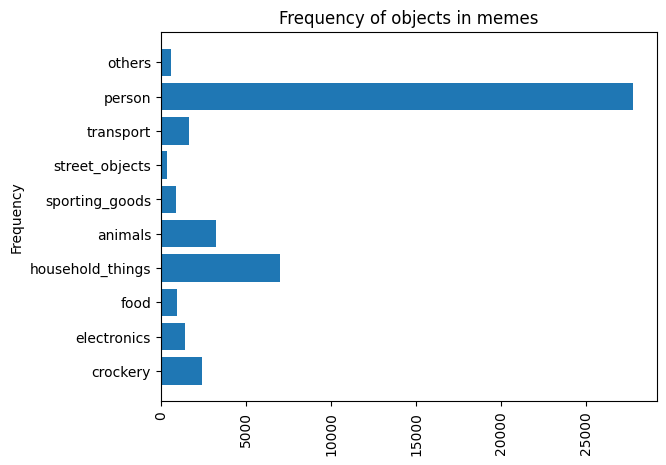

In [12]:
plt.ylabel("Frequency")
plt.title("Frequency of objects in memes")
bars = plt.barh(list(categories_and_freq.keys()), list(categories_and_freq.values()))
plt.xticks(rotation ='vertical')
plt.show()

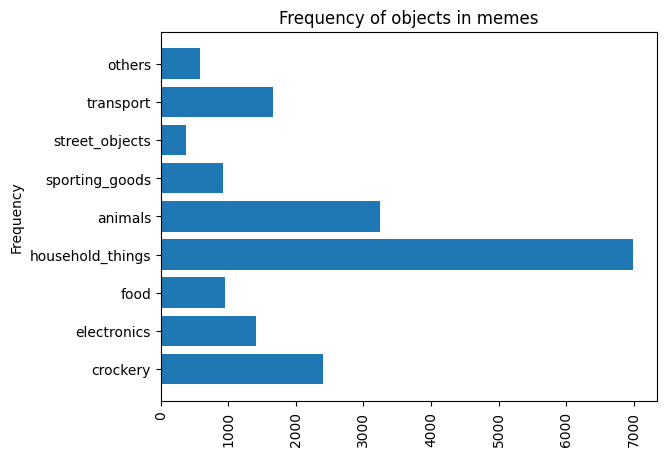

In [13]:
# plot without the person category

copy = categories_and_freq.copy()
del copy['person']

plt.ylabel("Frequency")
plt.title("Frequency of objects in memes")
bars = plt.barh(list(copy.keys()), list(copy.values()))
plt.xticks(rotation ='vertical')
plt.show()

In [14]:
### New dataset sampled from the original dataset

dir_list = os.listdir(path + '/sampled_dataset/')
dir_list.sort(reverse = True)

new_dataset = open(path + '/sampled_dataset/' + dir_list[0]).read().split('/')

for file in dir_list[1:-1]:
  f = open(path + '/sampled_dataset/' + file)
  images_new = f.read().split('/')
  new_dataset.extend(images_new)

In [15]:
image_indexes = np.arange(len(new_dataset))
random.shuffle(image_indexes) # shuffling the dataset to make the sample diverse
shuffled_images_new = [new_dataset[index] for index in image_indexes]

# Task B : Caption Impact Assesment

<b>Approach :</b><br>

* We will remove the caption from the images using image processsing techniques.
* Run the object detection algorithm again on both the images containing caption and without the caption.
* Check if there are any changes in the objects detected in the images containing captions and without the captions.
* Check the difference in confidence levels of the objects detected after processing.

This way we can assess the impact of captions in object detection.

In [16]:
def remove_caption(img):
  """
  Remove text from images

  """

  #General Approach.....
  #Use keras OCR to detect text, define a mask around the text, and inpaint the
  #masked regions to remove the text.
  #To apply the mask we need to provide the coordinates of the starting and
  #the ending points of the line, and the thickness of the line

  #The start point will be the mid-point between the top-left corner and
  #the bottom-left corner of the box.
  #the end point will be the mid-point between the top-right corner and the bottom-right corner.
  #The following function does exactly that.
  def midpoint(x1, y1, x2, y2):
      x_mid = int((x1 + x2)/2)
      y_mid = int((y1 + y2)/2)
      return (x_mid, y_mid)

  #Main function that detects text and inpaints.
  #Inputs are the image path and kreas_ocr pipeline
  def inpaint_text(img_path, pipeline):
      # read the image
      img = keras_ocr.tools.read(img_path)

      # Recogize text (and corresponding regions)
      # Each list of predictions in prediction_groups is a list of
      # (word, box) tuples.
      prediction_groups = pipeline.recognize([img])

      #Define the mask for inpainting
      mask = np.zeros(img.shape[:2], dtype="uint8")
      for box in prediction_groups[0]:
          x0, y0 = box[1][0]
          x1, y1 = box[1][1]
          x2, y2 = box[1][2]
          x3, y3 = box[1][3]

          x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
          x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

          #For the line thickness, we will calculate the length of the line between
          #the top-left corner and the bottom-left corner.
          thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

          #Define the line and inpaint
          cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
          thickness)
          inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

      return(inpainted_img)

  # keras-ocr will automatically download pretrained
  # weights for the detector and recognizer.
  pipeline = keras_ocr.pipeline.Pipeline()

  img_text_removed = inpaint_text(img, pipeline)

  # plt.imshow(img_text_removed)

  # cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))
  img_text_removed = cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB)

  return img_text_removed

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 4s 4s/step


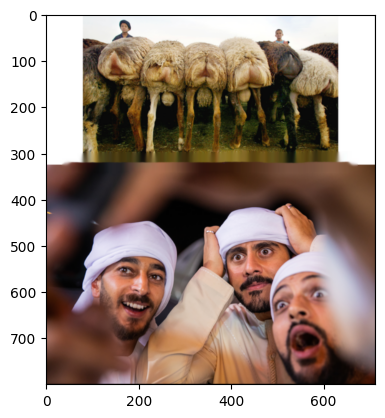

In [18]:
# example of a meme after the captions are removed

img = cv2.imread(path + '/hateful_memes/img/01348.png')
caption_removed_image = remove_caption(img)
plt.imshow(caption_removed_image)

In [19]:
model = ultralytics.YOLO("yolov8x.pt")

#### ⚠️ Do not run the cell below.

In [ ]:
num_of_extra_objects_detected = 0
num_of_imgs_extra_objects_detected = 0
num_of_imgs_less_objects_detected = 0
num_of_new_detections = 0
n_imgs_positive_conf = 0
n_imgs_negative_conf = 0
count = 0
positive_conf, negative_conf = 0, 0

for meme in shuffled_images_new[:500]:
  meme_ = cv2.imread(path + '/hateful_memes/img/' + meme)
  original_image = cv2.resize(meme_, (416, 416)) # resizing memes to the dimensions required for yolo v8 model.
  caption_removed_image = remove_caption(original_image)

  # detecting objects in images before and after processing
  results_original = model.predict(original_image)
  results_processed = model.predict(caption_removed_image)

  if len(results_original[0].boxes) > 0:
    total_confidence_o = 0.0
    result = results_original[0]
    num_of_objects_detected_orig = len(result.boxes)
    for object in result.boxes:
      total_confidence_o += object.conf

  if len(results_processed[0].boxes) > 0:
    total_confidence_p = 0.0
    result = results_processed[0]
    num_of_objects_detected_proc = len(result.boxes)
    for object in result.boxes:
      total_confidence_p += object.conf

  if (len(results_processed[0].boxes)!=0 and len(results_original[0].boxes)==0):
    num_of_new_detections += 1

  if num_of_objects_detected_orig != num_of_objects_detected_proc:
    diff = num_of_objects_detected_proc - num_of_objects_detected_orig
    if diff>0:
      num_of_extra_objects_detected += diff
      num_of_imgs_extra_objects_detected += 1
    else:
      num_of_imgs_less_objects_detected += 1

  diff_conf = total_confidence_p - total_confidence_o
  if diff_conf > 0:
    n_imgs_positive_conf += 1
    positive_conf += diff_conf
  else:
    n_imgs_negative_conf += 1
    negative_conf += abs(diff_conf)

  total_confidence_o, total_confidence_p = 0, 0
  num_of_objects_detected_orig, num_of_objects_detected_proc = 0, 0

  count += 1
  if count%50 == 0:
    print()
    print("="*100)
    print(f'{count} images detection completed')
    print("="*100)

print("\nObject detection for all of the images finished !!")

In [28]:
# Caption Impact Analysis Report
print("="*120)
print("Caption Impact Analysis Report")
print("="*120)
print(f"Number of processed images in which greater number of objects were found compared to original images = {num_of_imgs_extra_objects_detected}")
print(f"Total number of extra objects detected after processing = {num_of_extra_objects_detected}")
print(f"Number of processed images in which less number of objects were found compared to original images = {num_of_imgs_less_objects_detected}")
print(f"Number of processed images in which object detections were present whereas in the original images it was absent = {num_of_new_detections}")
print(f"Number of images in which the confidence of detections increased after processing = {n_imgs_positive_conf}")
print(f"Number of images in which the confidence of detections decreased after processing = {n_imgs_negative_conf}")
print(f"Average positive confidence increase = {(int(positive_conf[0])/n_imgs_positive_conf)*100}")
print(f"Average negative confidence increase = {(int(negative_conf[0])/n_imgs_negative_conf)*100}")
print()
print("="*120)
print("="*120)

Caption Impact Analysis Report
Number of processed images in which greater number of objects were found compared to original images = 89
Total number of extra objects detected after processing = 142
Number of processed images in which less number of objects were found compared to original images = 173
Number of processed images in which object detections were present whereas in the original images it was absent = 0
Number of images in which the confidence of detections increased after processing = 173
Number of images in which the confidence of detections decreased after processing = 327
Average positive confidence increase = 32.947976878612714
Average negative confidence increase = 62.99694189602446

